# Problem Statement
# Build a model which predicts sales based on the money spent on different platforms for marketing.

Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
advertising=pd.read_csv("E:\Data Trained\Project 6\saleschannel.csv")
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


EDA

In [3]:
advertising.shape

(200, 5)

In [5]:
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
advertising.isnull().sum()*100/advertising.shape[0]

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

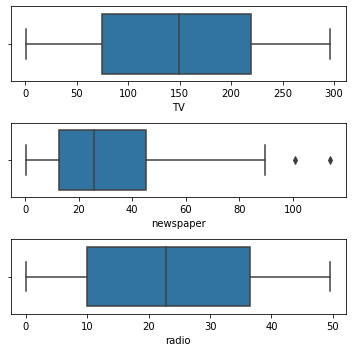

In [15]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

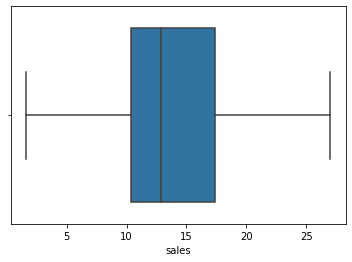

In [13]:
sns.boxplot(advertising['sales'])
plt.show()

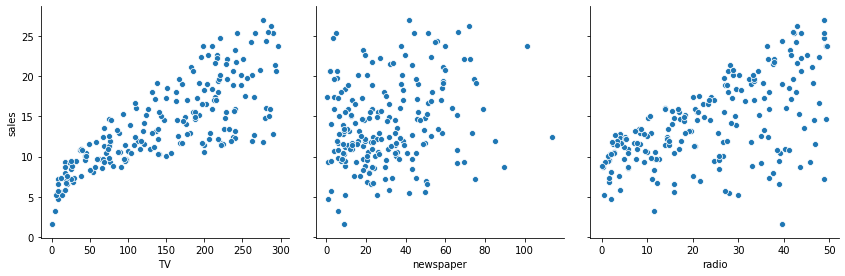

In [17]:
sns.pairplot(advertising,x_vars=['TV','newspaper','radio'], y_vars='sales',height=4,aspect=1,kind='scatter')
plt.show()

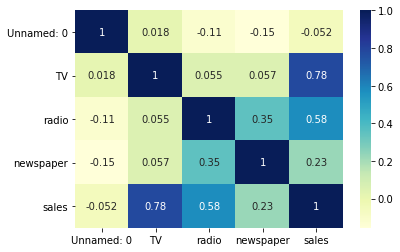

In [18]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So going ahead and performing simple linear regression using TV as our feature variable.

Model Building
In our case:
y=c+m1×TV 
The  m  values are called the model coefficients or model parameters.

Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [21]:
X = advertising['TV']
y = advertising['sales']

We need to split our variable into training and testing sets. we'll perform this by importing train_test_split from the sklearn.model_selection library. we will keep 70% of the data in train dataset and the rest 30% in test dataset



In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7,test_size = 0.3,random_state = 100)

In [45]:
X_train.values.reshape(1,-1)
X_train=pd.DataFrame(X_train)
print(X_train.shape)
X_test.values.reshape(1,-1)
X_test=pd.DataFrame(X_test)
print(X_test.shape)

(140, 1)
(60, 1)


In [44]:
y_train.values.reshape(1,-1)
y_train=pd.DataFrame(y_train)
print(y_train.shape)
y_test.values.reshape(1,-1)
y_test=pd.DataFrame(y_test)
print(y_test.shape)

(140, 1)
(60, 1)


In [46]:
# import model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(linreg.intercept_)
print(linreg.coef_)

[6.98966586]
[[0.04649736]]


In [52]:
y_pred=linreg.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 2.1619849326720724
MSE 7.97579853285485
RMSE 2.8241456288327007


In [66]:
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = advertising[feature_cols]

# select a Series from the DataFrame
y = advertising.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [69]:
from sklearn.externals import joblib

joblib.dump(linreg,'linregsave.pkl')

['linregsave.pkl']

In [74]:
loaded_model = joblib.load('linregsave.pkl')
result = loaded_model.score(X_test, y_test)
print(result)

0.9176214942248908
